## Here we are going to implement the text classification use case with transformer 
## .....

In [ ]:
## Lifecycle of a NLPS TAsk
## Input Data [Download the data or create your own data]
## Tokenize the Datav[Tokenization] --> Vocabulary or Dictionary with indexes
## Token Embedding --> Embedding algorithms like wor2vec will genrate embedding vector for word, sentences, paragraph and are called word embedding, sentence embedding, and paragraph embeding.
## in models like BERT, we need to generate the positional embedding as well which is a model based approach, while in the generat transformer, this positional encoding is a mathematical function.
## Encoded stack.

In [3]:
import pandas as pd
df = pd.read_csv("/Users/balmukundmishra/Desktop/ALL-CSV-ML-Data-Files-Download/twitter_multi_class_sentiment.csv")

In [4]:
df

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,sadness
15996,i am now turning and i feel pathetic that i am...,0,sadness
15997,i feel strong and good overall,1,joy
15998,i feel like this was such a rude comment and i...,3,anger


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [6]:
df.isnull().sum()

text          0
label         0
label_name    0
dtype: int64

In [7]:
df.describe()

,label
count,16000.000000
mean,1.565937
std,1.501430
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,5.000000


In [8]:
df['label'].value_counts()

1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: label, dtype: int64

## Dataset analysis

In [9]:
import matplotlib.pyplot as plt


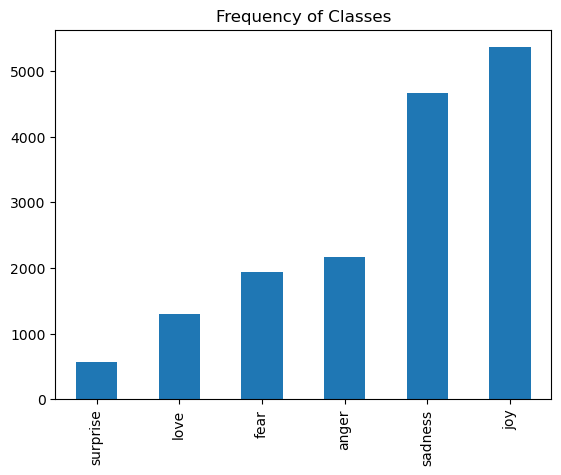

In [10]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.bar()
plt.title("Frequency of Classes")
plt.show()
#label_counts.plot.barh()

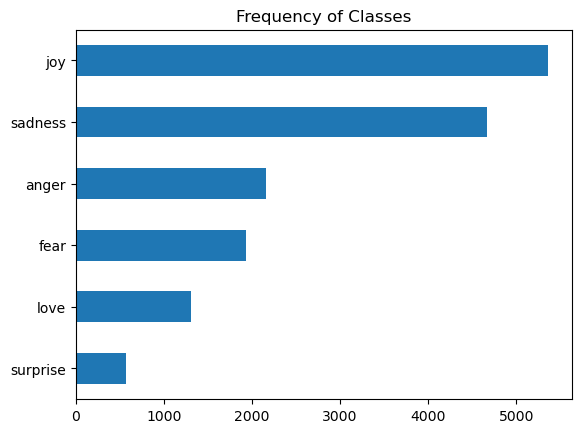

In [11]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()
#label_counts.plot.barh()

<Axes: title={'center': 'words_per_tweet'}, xlabel='label_name'>

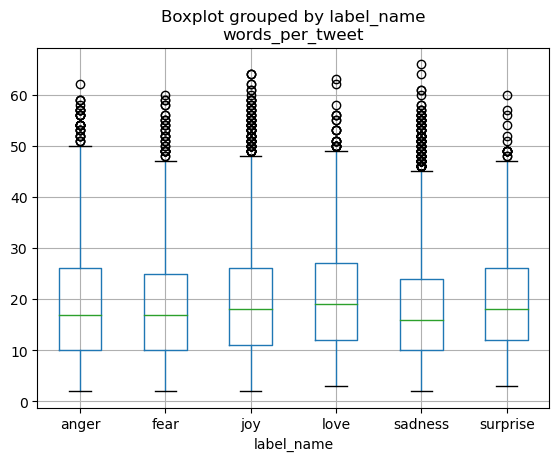

In [12]:
df['words_per_tweet']=df['text'].str.split().apply(len)

df.boxplot("words_per_tweet",by="label_name")

## Text to token conversion

In [13]:
#!pip install transformers

from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "I like to travel, thats why i am plannig to visit into hills thes week."

encoded_text = tokenizer(text)
print(encoded_text)

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'input_ids': [101, 1045, 2066, 2000, 3604, 1010, 2008, 2015, 2339, 1045, 2572, 2933, 25518, 2000, 3942, 2046, 4564, 1996, 2015, 2733, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
## In this token_type tell us which type of text is this. and here 0 reprents in the toke_type_id represnts that this is single sentence text.

In [14]:
print("lets check the length of the tokens/vocabs avialble in this tokenizer = ",len(tokenizer.vocab))
tokenizer.vocab

lets check the length of the tokens/vocabs avialble in this tokenizer =  30522


{'##ship': 9650,
 'benedict': 12122,
 'stayed': 4370,
 '[unused597]': 602,
 'coloring': 22276,
 '‿': 1534,
 'marquis': 13410,
 '##cia': 7405,
 'loyalists': 26590,
 'microscopy': 29105,
 'stan': 9761,
 'cool': 4658,
 'pv': 26189,
 'hauling': 23113,
 'registered': 5068,
 'sore': 14699,
 'decreases': 17913,
 'tax': 4171,
 'unopposed': 17123,
 'yourself': 4426,
 'balance': 5703,
 '₀': 1547,
 '##ako': 20411,
 'ported': 27650,
 '##⁄₄': 27392,
 '##ind': 22254,
 'intelligent': 9414,
 'down': 2091,
 'crow': 11465,
 'reeves': 17891,
 'maha': 24404,
 'protecting': 8650,
 'irene': 12855,
 'nsa': 23971,
 'protagonists': 21989,
 'rocco': 28167,
 '##very': 27900,
 'canteen': 26449,
 'congressman': 12295,
 '[unused201]': 206,
 'caden': 23600,
 'cones': 23825,
 '##rce': 19170,
 '##ulates': 18969,
 'devlin': 24389,
 'dump': 15653,
 'escorted': 13127,
 'allergic': 27395,
 '野': 1963,
 'suggests': 6083,
 'openings': 16556,
 'willy': 16172,
 'surviving': 6405,
 '##onzo': 29452,
 '##corp': 24586,
 'frontal':

## Dataloader and train test split

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df,test_size=0.3, stratify=df['label_name'])

test, validation = train_test_split(test, test_size=1/3, stratify=test['label_name'])

train.shape, test.shape, validation.shape

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


((11200, 4), (3200, 4), (1600, 4))

In [16]:
#!pip install datasets
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        'train':Dataset.from_pandas(train, preserve_index=False),
        'test':Dataset.from_pandas(test,preserve_index=False),
        'validation':Dataset.from_pandas(validation, preserve_index=False)
        
    }
)

dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet'],
        num_rows: 1600
    })
})

## Tokenization of the dataset [Here we are tokenizing the emotion /sentiment data]

In [17]:
dataset['train'][0]

{'text': 'i feel assured that the future of online entertainment rests in good hands',
 'label': 1,
 'label_name': 'joy',
 'words_per_tweet': 13}

In [18]:
def tokenize(batch):
    temp =  tokenizer(batch['text'], padding=True, truncation=True)
    return temp

In [19]:
print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1045, 2514, 8916, 2008, 1996, 2925, 1997, 3784, 4024, 16626, 1999, 2204, 2398, 102, 0, 0, 0, 0, 0, 0], [101, 1045, 2823, 2514, 14710, 2004, 1037, 2388, 3110, 2066, 10047, 7989, 2032, 1998, 2145, 2117, 16986, 2026, 28586, 4813, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [20]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Map: 100%|██████████| 1600/1600 [00:00<00:00, 31469.43 examples/s]


In [21]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'words_per_tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [22]:
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

In [23]:
label2id

{'joy': 1, 'sadness': 0, 'fear': 4, 'anger': 3, 'love': 2, 'surprise': 5}

In [24]:
id2label

{1: 'joy', 0: 'sadness', 4: 'fear', 3: 'anger', 2: 'love', 5: 'surprise'}

## Model Building

In [25]:
from transformers import AutoModel
import torch


In [78]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu



huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Looking in indexes: https://download.pytorch.org/whl/cpu


In [26]:
model = AutoModel.from_pretrained(model_ckpt)

In [27]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [28]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.45.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [29]:
model.config.architectures

['BertForMaskedLM']

In [30]:
model.config.id2label

{0: 'LABEL_0', 1: 'LABEL_1'}

In [34]:
from transformers import AutoModelForSequenceClassification, AutoConfig

num_labels = len(label2id)
device = torch.device("cude" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.45.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [37]:
from transformers import TrainingArguments
batch_size =64
training_dir = "birt_base_train_dir"
training_args = TrainingArguments(
    output_dir= training_dir,
    overwrite_output_dir=True,
    num_train_epochs=2,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    disable_tqdm=False
)

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [40]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [42]:
## or the other option is to use sklearn metrics

from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {"accuracy" : acc, "f1":f1}



In [43]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotion_encoded['train'],
                  eval_dataset=emotion_encoded['validation'],
                  tokenizer=tokenizer)

In [44]:
trainer.train()

  0%|          | 0/350 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [35]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

In [ ]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=id2label.values()))

In [ ]:
# plot the confusion metrics

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
c= confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(c, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt='d',cbar=False, cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
text = "I am super happy today, a have done it finally."

def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors='pt').to(device)

  with torch.no_grad():
    output = model(**input_encoded)

  logits = output.logits
  pred = torch.argmax(logits, dim=1).item()

  return id2label[pred]

get_prediction(text)

In [ ]:
trainer.save_model('/content/drive/MyDrive/Colab Notebooks/bert-base-uncased-sentiment-model')

In [ ]:
from transformers import pipeline

sentiment_model = pipeline("text-classification", model='bert-base-uncased-sentiment-model')

sentiment_model(text)